# Introduction To Data Science HW5 3 Seaborn Plots for Baseball Data 

In [205]:
# This tidy data tutorial is doing the replication of the http://tomaugspurger.github.io/modern-5-tidy.html
# Since the html file data that basketball-reference.com has changed, for NBA_2016_games.html only shows the October games instead all 2016 seasons, result may not be the same as the reference

# To show graphs in jupyter notebook using %matplotlib inline 
%matplotlib inline 
# Import numby, pandas, seaborn, matplotlib.pyplot libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Check the os envrionment and set to modern_pandas_epub
if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

# Set up Pandas for display max rows = 10
pd.options.display.max_rows = 10

# Set up Seaborn style = ticks and context = talk
sns.set(style='ticks', context='talk')

In [206]:
# Set up the directory for nba.csv to put in and name it as fp
fp = '/Users/ChienMingHuang/Desktop/Rutgers MIT Course/bos.csv'

# This if else is make sure that if in the directory without nba.csv file, then we will use pandas to read the nba html files for tables
# Let games = tables[0]
# And for games.to_csv to write the fp into csv file
# Else is that if exists fp, then pandas just needs to read fp csv file
if not os.path.exists(fp):
    tables = pd.read_html("https://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml#team_schedule::none")
    games = tables[0]
    games.to_csv(fp)
else:
    games = pd.read_csv(fp)

# Show the head rows for games by .head()   
games.head()

,Unnamed: 0,Gm#,Date,Unnamed: 2,Tm,,Opp,W/L,R,RA,...,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,0,1,"Tuesday, Apr 5",boxscore,BOS,@,CLE,W,6,2,...,1-0,1,Tied,Price,Kluber,NaN,3:13,D,34493,+
1,1,2,"Wednesday, Apr 6",boxscore,BOS,@,CLE,L,6,7,...,1-1,2,1.0,McAllister,Tazawa,Allen,3:29,N,10298,-
2,2,3,"Friday, Apr 8",boxscore,BOS,@,TOR,W,8,7,...,2-1,2,1.5,Barnes,Storen,Kimbrel,3:24,N,48871,+
3,3,4,"Saturday, Apr 9",boxscore,BOS,@,TOR,W,8,4,...,3-1,2,1.0,Porcello,Dickey,NaN,2:48,D,47138,++
4,4,5,"Sunday, Apr 10",boxscore,BOS,@,TOR,L,0,3,...,3-2,2,2.0,Estrada,Wright,Osuna,2:27,D,46158,-


In [207]:
# Dropna specific data with NA values using .dropna() for 'Unnamed:2' this column to remove the "Month headers" that slipped into the table.
games= games.dropna(subset=['Unnamed: 2'])

# Show the tail rows for games by .tail() to check all Monthly headers are removed
games.tail()

,Unnamed: 0,Gm#,Date,Unnamed: 2,Tm,,Opp,W/L,R,RA,...,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
162,162,158,"Wednesday, Sep 28",boxscore,BOS,@,NYY,L-wo,3,5,...,92-66,1,up 5.0,Pazos,Kimbrel,NaN,3:28,N,35520,--
163,163,159,"Thursday, Sep 29",boxscore,BOS,@,NYY,L,1,5,...,92-67,1,up 5.0,Sabathia,Owens,NaN,3:17,N,41597,---
164,164,160,"Friday, Sep 30",boxscore,BOS,NaN,TOR,W,5,3,...,93-67,1,up 5.0,Ziegler,Biagini,Kimbrel,3:25,N,37661,+
166,166,161,"Saturday, Oct 1",boxscore,BOS,NaN,TOR,L,3,4,...,93-68,1,up 5.0,Osuna,Kimbrel,NaN,3:29,N,37396,-
167,167,162,"Sunday, Oct 2",boxscore,BOS,NaN,TOR,L,1,2,...,93-69,1,up 4.0,Sanchez,Ziegler,Osuna,3:14,D,36787,--


In [208]:
# To replace or modify game['Date'] for later fit in panda to_datetime 
# 1st have to renaming the date that exist two games with naming Wednesday, May 18 (1) and  Wednesday, May 18 (2) to only the Wednesday, May 18 exists.
games['Date']= games['Date'].replace(['Wednesday, May 18 (1)', 'Wednesday, May 18 (2)'], 'Wednesday, May 18')

# 2ne have to adjust the object Date to put the year= 2016 for later fit in panda to_datetime()
games['Date']= games['Date']+ ', 2016'
games['Date']

0         Tuesday, Apr 5, 2016
1       Wednesday, Apr 6, 2016
2          Friday, Apr 8, 2016
3        Saturday, Apr 9, 2016
4         Sunday, Apr 10, 2016
                ...           
162    Wednesday, Sep 28, 2016
163     Thursday, Sep 29, 2016
164       Friday, Sep 30, 2016
166      Saturday, Oct 1, 2016
167        Sunday, Oct 2, 2016
Name: Date, Length: 162, dtype: object

In [211]:
# Set up column_names and give every attributes their description
column_names = {'Gm#': 'gmnumber','Date': 'date', 'Unamed: 2': 'boxscore',
                'Tm': 'home_team', 'Opp': 'away_team', 'W/L': 'WL_record',
                'R': 'home_points', 'RA': 'away_points', 'Inn': 'morethan9innings', 
                'W-L': 'overall_W-L', 'Rank': 'home_team_rank',
                'GB': 'games_back', 'Win': 'win_pitcher', 'loss': 'loss_pitcher',
                'Save': 'save_pitcher', 'Time': 'durationtime', 'D/N': 'dayornight',
                'Attendance':'attendance_number', 'Streak': 'winlosestreak'}

# Use the rename for the columns to rename the games columns
# For [['date', ...]] just show this nine columns
# Assign the date use lambda function and give the date its format = '%A, %b %d, %Y'
# %A: all Weekday as locale’s full name, %b: Month as locale’s abbreviated name, %d: Day of the month as a zero-padded decimal number, %Y: Year with century as a decimal number 
# Assign away_points, home_points, and attendance_number to numeric using panda ..to_numeric() and invalid parsing will be set as NaN using errors ='coerce'
games = (games.rename(columns=column_names)
         [['date', 'away_team', 'away_points', 'home_team', 'home_points', 'WL_record', 'win_pitcher', 'dayornight', 'attendance_number']]
         .assign(date=lambda x: pd.to_datetime(x['date'], format='%A, %b %d, %Y'))
         .assign(away_points=lambda x: pd.to_numeric(x['away_points'], errors='coerce'))
         .assign(home_points=lambda x: pd.to_numeric(x['home_points'], errors='coerce'))
         .assign(attendance_number=lambda x: pd.to_numeric(x['attendance_number'], errors='coerce'))
        )

# Show the head rows for games by .head() 
games.head()

,date,away_team,away_points,home_team,home_points,WL_record,win_pitcher,dayornight,attendance_number
0,2016-04-05,CLE,2,BOS,6,W,Price,D,34493
1,2016-04-06,CLE,7,BOS,6,L,McAllister,N,10298
2,2016-04-08,TOR,7,BOS,8,W,Barnes,N,48871
3,2016-04-09,TOR,4,BOS,8,W,Porcello,D,47138
4,2016-04-10,TOR,3,BOS,0,L,Estrada,D,46158


In [204]:
# Show the games each column data types for later seaborn plot
games.dtypes

date                 datetime64[ns]
away_team                    object
away_points                   int64
home_team                    object
home_points                   int64
WL_record                    object
win_pitcher                  object
dayornight                   object
attendance_number             int64
dtype: object

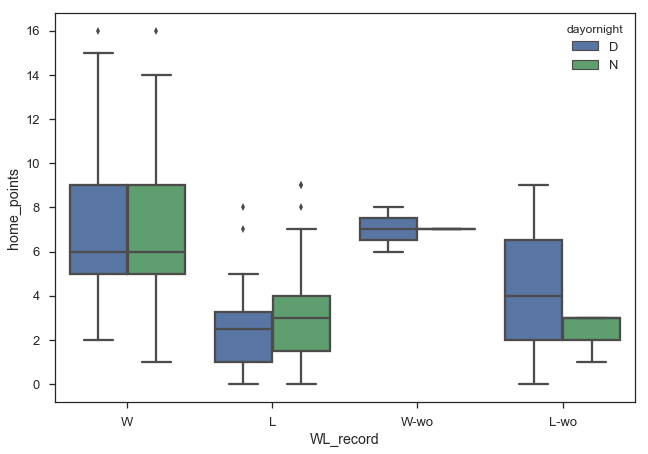

In [195]:
# Boxplot to know Boston Red Sox W/L_record home_points and relationship with day or night
# Use .boxplot(), set x= W/L record, y= home_points, and set hue= dayornight to see the category
ax = sns.boxplot(x="WL_record",y="home_points", hue="dayornight",
                    data=games)
# In this plot, we can see that day or night may not be a strong effect issue for Boston Red Sox to win or lose the game.
# Also we can see that average for Boston wins will get average 6 points, if loses will get around 3 points. For win walkoff is around 7, and lose walkoff is around 3-4.

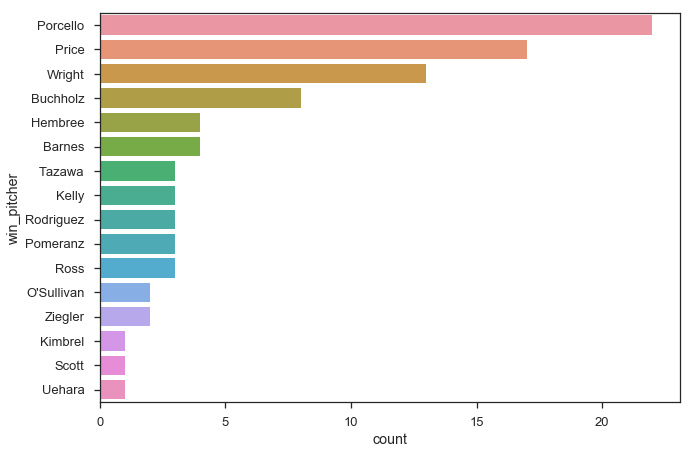

In [196]:
# Select the games that home_team wins and name as brswin
brswin= games[games.WL_record == ("W" or "W-wo")]

# Boston Red Sox Pitcher Wins Count Plot
# Use. countplot() to plot and use order = brswin['win_pitcher'].value_counts().index to plot the pither wins in a descending order
sns.countplot(y="win_pitcher", order = brswin['win_pitcher'].value_counts().index, data=brswin)
# We can see top3 pitcher in Boston Red Sox is Porcello, Price, and Wright

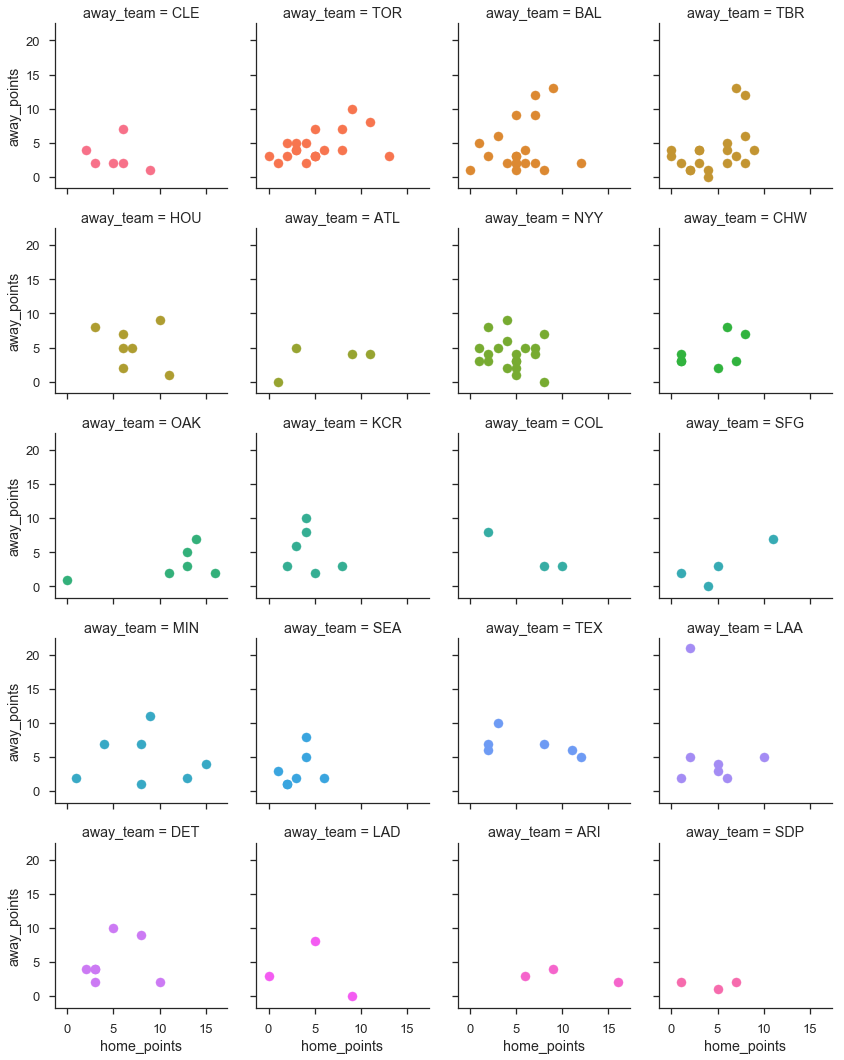

In [218]:
# Use the .FacetGrid function to link panda dataframe to a matplotlib figure with below structure 
# Data = games, col= 'away_team' means for the plot column side is 'team', col_wrap= 6 means that wrap the column variable at 6 this width. so in the picture will show six some plots in one rows
# hue= 'away_team' means that different team will different color in the plot and size= 2 means will be 2 inches height of each facet
g = sns.FacetGrid(games, col='away_team', hue='away_team', col_wrap=4)

# Use .map function to do scatter plot with x= home_points, and y = away_points
g.map(plt.scatter, 'home_points', 'away_points')

# Use .despine function to remove the top and right spines from plot
sns.despine()

# In this plot, we can see that Boston Red Sox combat with different away_team, how many points home_team get and away_team gets

# Reference
1. https://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml#team_schedule::none
2. https://chrisalbon.com/python/pandas_dropping_column_and_rows.html
3. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
4. https://chrisalbon.com/python/strings_to_datetime.html
5. http://strftime.org/
6. http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_numeric.html
7. https://seaborn.pydata.org/generated/seaborn.boxplot.html
8. https://seaborn.pydata.org/generated/seaborn.countplot.html
9. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html